In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# 1. Get numerical data from the data set
numerical = data.select_dtypes(np.number)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [4]:
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

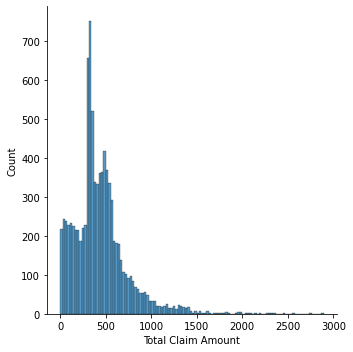

In [5]:
sns.displot(numerical['Total Claim Amount'])

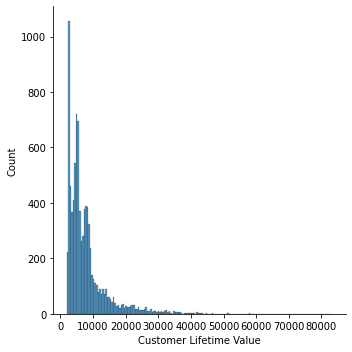

In [6]:
sns.displot(numerical['Customer Lifetime Value'])

#numerical['Number of Policies'].hist()

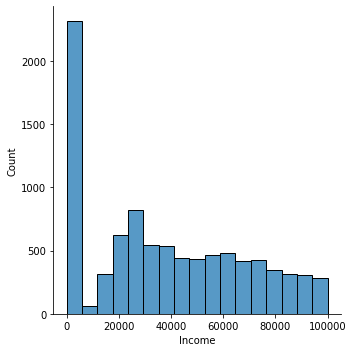

In [7]:

sns.displot(numerical['Income'])

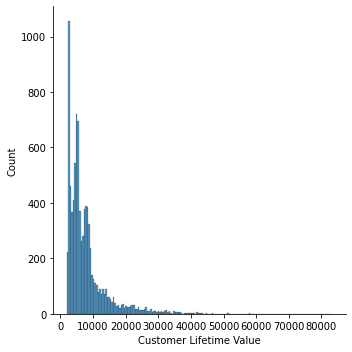

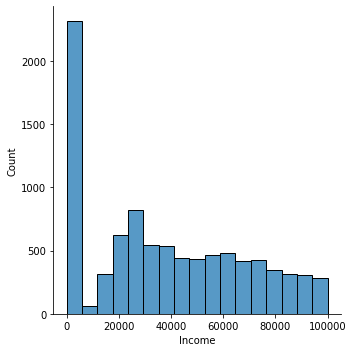

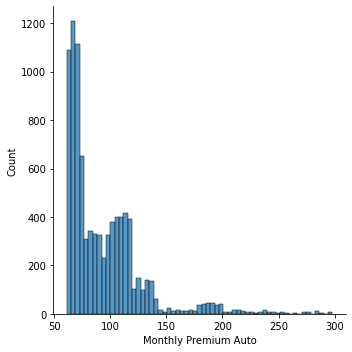

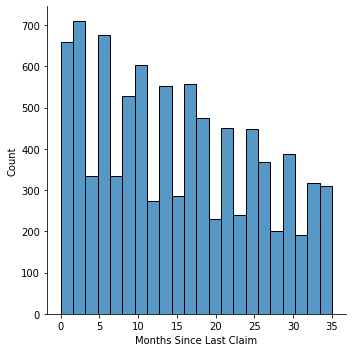

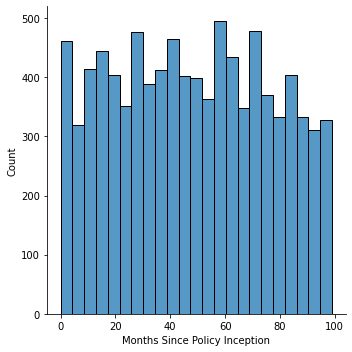

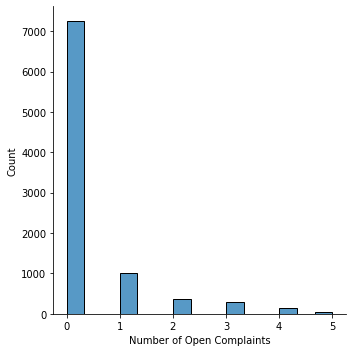

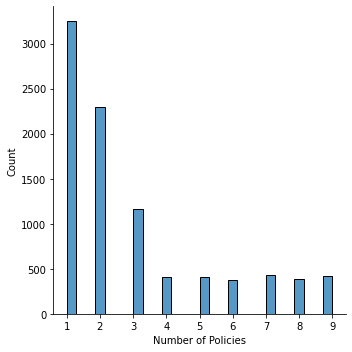

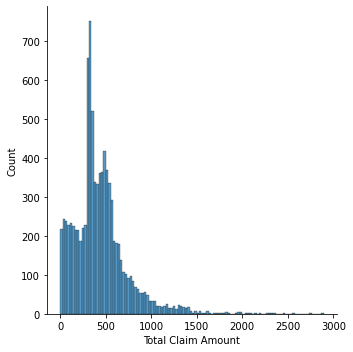

In [8]:
for col in numerical.columns:
    sns.displot(numerical[col])

In [9]:
# NO NORMAL DISTRIBUTION IN THE PLOTS

In [10]:
# Customer Lifetime Value, Number of Open Complaints and Total Claim Amount fit exponential distribution

In [11]:
# Clen data using the log function
def clean_data(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
for col in numerical.columns:
    numerical[col] = numerical[col].apply(lambda x: clean_data(x))
numerical.head()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_11552/2985395146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[col] = numerical[col].apply(lambda x: clean_data(x))


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,3.441462,4.750308,1.838849,1.505150,0.698970,0.0,0.000000,2.585248
1,3.843827,0.000000,1.973128,1.113943,1.623249,0.0,0.903090,3.053641
2,4.110166,4.688126,2.033424,1.255273,1.579784,0.0,0.301030,2.753179
3,3.883426,0.000000,2.025306,1.255273,1.812913,0.0,0.845098,2.724179
4,3.449277,4.641831,1.863323,1.079181,1.643453,0.0,0.000000,2.140291


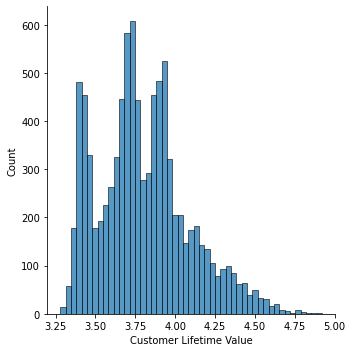

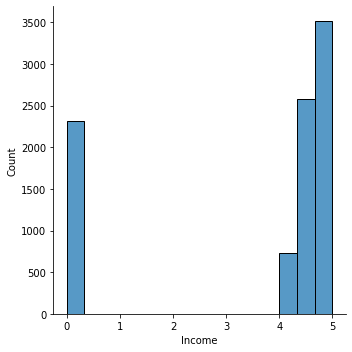

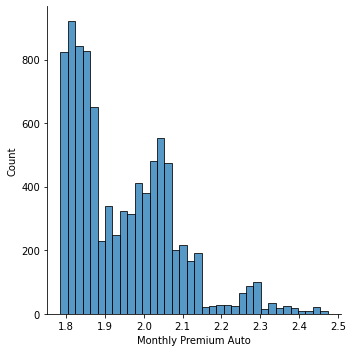

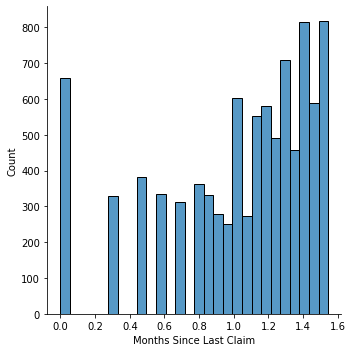

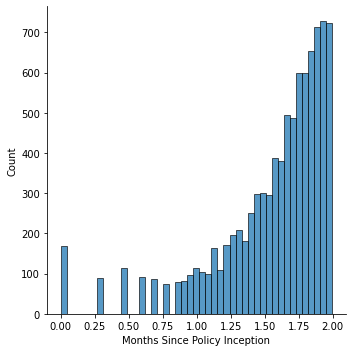

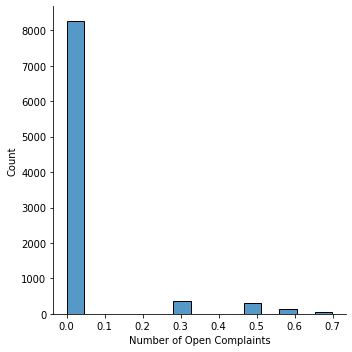

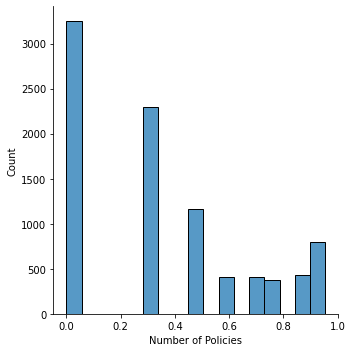

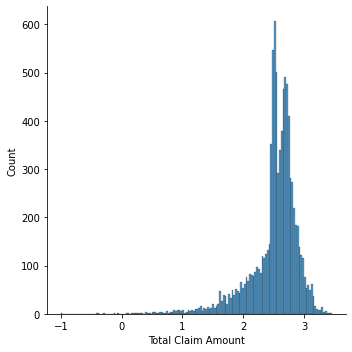

In [12]:
for col in numerical.columns:
    sns.displot(numerical[col])

In [14]:
#numerical['Customer Lifetime Value'] = np.where(numerical['Customer Lifetime Value'] > 3, 3, numerical['Customer Lifetime Value'])
#sns.displot(numerical['Customer Lifetime Value'])
#numerical['Customer Lifetime Value'].max()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_11552/3920672502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['Customer Lifetime Value'] = np.where(numerical['Customer Lifetime Value'] > 3, 3, numerical['Customer Lifetime Value'])


3.0

In [ ]:
# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
# Log transformations do not change the nature of the plots becuse they are counts. Even if a value is transformed using log
# its count remains the same